### [이미지 데이터셋 생성]
-	흑백 즉, Grayscale 이미지
-	컬러 이미지

[1] 모듈 로딩 및 데이터 준비 <hr>

In [ ]:
import cv2 # 일번적인 포맷의 이미지 처리 모듈
import matplotlib.pyplot as plt  
import numpy	as np	# 이미지 데이터가 저장된 타입 관련 모듈
import os # 폴더, 파일, 경로 관련 모듈

In [30]:
# 데이터 준비
# 경로 지정
IMG_DIR ='./image/cat_dog/'
GRAY_DIR = './image/Gray_image/'
IMG_CSV ='./cat_dog.csv'

In [31]:
# 데이터 파일명 리스트
# 
IMG_FILES = os.listdir(IMG_DIR)

print(f'IMG_FILES => {len(IMG_FILES)} 개')

IMG_FILES => 342 개


# [2] 이미지 데이터 로딩 및 전처리

In [32]:
## 이미지 전처리 설정

COL, ROW = 75,75 
# COL = 가로 
# ROW = 세로

In [33]:
# csv 파일 열기

with open(IMG_CSV, mode='a') as csvF:


	# 이미지 로딩 

	for filename in IMG_FILES:
		# 경로 + 파일명
		path_name = IMG_DIR+filename

		#	디버깅용 => 확인 
		# print(path_name)

		# 이미지 데이터 가져오기
		imgData = cv2.imread(path_name, cv2.IMREAD_GRAYSCALE)
		
		# 디버깅용
		# print(imgData)
		# plt.imshow(imgData, cmap='gray')

		# 이미지 저장
		#save = cv2.imwrite(GRAY_DIR+'gray_'+filename)
		
		# 이미지 전처리 => 크기 통일 (이미지 마다 크기가 다르기 때문)

		resize_Data = cv2.resize(imgData, (COL,ROW))
		#plt.imshow(resize_Data, cmap='gray')
		
		is_save = cv2.imwrite(GRAY_DIR+'gray_'+filename,resize_Data)

		if not is_save:
			print(f'{filename} 저장실패')

		# 이진화
		# ret, thresh_cv = cv2.threshold(resize_Data , -1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) 
		# print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환
		# plt.imshow(thresh_cv, cmap='gray')


		# csv 파일에 쓰기 => 타겟, 피쳐 
		# target, 픽1, 픽2, .....
		target = filename[:3]
		# 2차원 데이터를 1차원으로
		feature = resize_Data.reshape(-1)
		print(target,feature.shape)
		
		csvfeature =(','.join( list(map(str, feature))))
		
		csvF.write(target+',')
		csvF.write(csvfeature+'\n')


		#break

cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat (5625,)
cat 

In [34]:
data = np.array([[2,3,4,1,2],[6,7,8,9,0]])
data = data.reshape(-1)
data

array([2, 3, 4, 1, 2, 6, 7, 8, 9, 0])

In [35]:
','.join( list(map(str, data)) )

'2,3,4,1,2,6,7,8,9,0'

In [36]:
import pandas as pd
imgDF = pd.read_csv(IMG_CSV, header=None)

In [37]:
imgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Columns: 5626 entries, 0 to 5625
dtypes: int64(5625), object(1)
memory usage: 73.4+ MB


In [38]:
imgDF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,5625
0,cat,251,246,254,249,244,239,244,251,239,...,39,47,58,64,65,58,53,57,62,67
1,cat,251,246,254,249,244,239,244,251,239,...,39,47,58,64,65,58,53,57,62,67


In [39]:
imgDF.iloc[0]

0       cat
1       251
2       246
3       254
4       249
       ... 
5621     58
5622     53
5623     57
5624     62
5625     67
Name: 0, Length: 5626, dtype: object

In [40]:
imgDF.iloc[0,1:].values.reshape(COL,ROW)

array([[np.int64(251), np.int64(246), np.int64(254), ..., np.int64(112),
        np.int64(137), np.int64(148)],
       [np.int64(251), np.int64(248), np.int64(255), ..., np.int64(92),
        np.int64(102), np.int64(129)],
       [np.int64(250), np.int64(241), np.int64(254), ..., np.int64(121),
        np.int64(106), np.int64(112)],
       ...,
       [np.int64(142), np.int64(141), np.int64(139), ..., np.int64(62),
        np.int64(63), np.int64(67)],
       [np.int64(129), np.int64(134), np.int64(135), ..., np.int64(57),
        np.int64(63), np.int64(66)],
       [np.int64(107), np.int64(105), np.int64(102), ..., np.int64(57),
        np.int64(62), np.int64(67)]], dtype=object)

In [42]:
## 0번행 추출 
imgSR=imgDF.iloc[0]
imgSR
### 타겟(라벨)(cat)이 붙어나옴

0       cat
1       251
2       246
3       254
4       249
       ... 
5621     58
5622     53
5623     57
5624     62
5625     67
Name: 0, Length: 5626, dtype: object

In [43]:
## - 행에서 라벨/타겟과 피쳐 분리
label = imgSR[0]            ### 리사이징
img = imgSR[1:].astype(int)         

label, img.shape, img.dtype  

('cat', (5625,), dtype('int64'))

In [ ]:
# 첫 번째 행(이미지)을 2차원으로 reshape
image_array = img.values.reshape(COL,ROW)

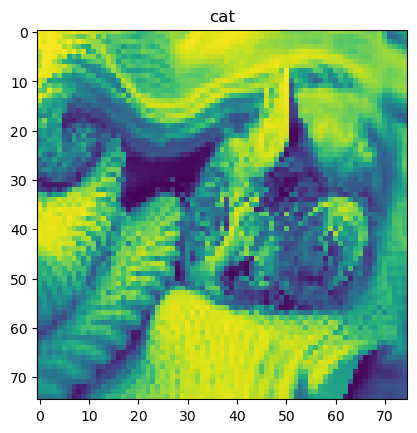

In [ ]:
## 시각화
plt.imshow(image_array, cv2.IMRE)
plt.title(label)
plt.show()